# 英語におけるn-gram

In [1]:
using Base.Iterators
ngram(s, n) = collect(zip((drop(s, k) for k = 0:n-1)...))

ngram (generic function with 1 method)

## bi-gramの作成

In [2]:
using CSV, DataFrames
open("Alice's Adventures in Wonderland by Lewis Carroll.txt") do f
    global all_text = read(f, String)
end
text = replace(lowercase.(all_text), r"@[0-9A-Z_a-z]+\W?|[\r\n!-@\[-`{-~“”]" => s"")
words = split(text)
pairs = ngram(words, 2)

26803-element Vector{Tuple{SubString{String}, SubString{String}}}:
 ("the", "project")
 ("project", "gutenberg")
 ("gutenberg", "ebook")
 ("ebook", "of")
 ("of", "alice’s")
 ("alice’s", "adventures")
 ("adventures", "in")
 ("in", "wonderland")
 ("wonderland", "by")
 ("by", "lewis")
 ("lewis", "carrollthis")
 ("carrollthis", "ebook")
 ("ebook", "is")
 ⋮
 ("ebooks", "and")
 ("and", "how")
 ("how", "tosubscribe")
 ("tosubscribe", "to")
 ("to", "our")
 ("our", "email")
 ("email", "newsletter")
 ("newsletter", "to")
 ("to", "hear")
 ("hear", "about")
 ("about", "new")
 ("new", "ebooks")

## bi-gramの頻度分析

In [3]:
using StatsBase
bigram_counter = StatsBase.countmap(pairs)
sorted_bigram_counter = sort(collect(bigram_counter), by=x->x[2], rev=true)

17615-element Vector{Pair{Tuple{SubString{String}, SubString{String}}, Int64}}:
          ("said", "the") => 198
            ("of", "the") => 130
        ("said", "alice") => 84
              ("in", "a") => 84
            ("in", "the") => 76
            ("to", "the") => 71
           ("and", "the") => 65
            ("it", "was") => 56
            ("as", "she") => 50
            ("at", "the") => 50
             ("to", "be") => 47
          ("a", "little") => 47
          ("the", "mock") => 46
                          ⋮
      ("first", "minute") => 1
         ("i’m", "a—i’m") => 1
         ("lesson", "to") => 1
         ("in", "search") => 1
   ("and", "fortunately") => 1
         ("right", "i’m") => 1
        ("she", "spread") => 1
        ("went", "round") => 1
 ("do", "notnecessarily") => 1
    ("under", "sentence") => 1
  ("once", "considering") => 1
    ("everymoment", "to") => 1

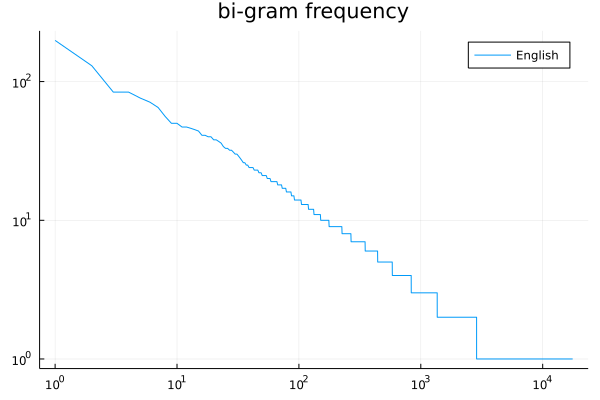

In [4]:
using Plots
plot(map(x -> x[2], sorted_bigram_counter), xaxis=:log, yaxis=:log, title="bi-gram frequency", label="English")